# DATA ANALYCT PROJECT

# NBAscore

#### Lecturer name: Dr Lihi deri


**Introduction:**



In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [20]:
url="https://raw.githubusercontent.com/Dansayada/data_project/main/game_scores.csv"
data= pd.read_csv(url)

<Axes: xlabel='HOME_FG3A', ylabel='HOME_FG3'>

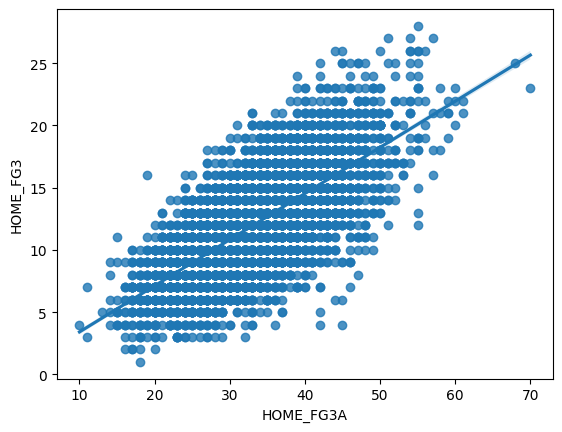

In [21]:
sns.regplot(data=data, x='HOME_FG3A', y='HOME_FG3')

#### ככל שמספר הנסיונות גדול כך מספר הקליעות יהיה בהתאם ניתן לראות קו ליניארי שמייצג את קצב השינוי העולה הקבוע במספר השלשות

In [22]:
x = data.groupby('SEASON')[['HOME_BLK', 'AWAY_BLK']].mean()
x

,HOME_BLK,AWAY_BLK
SEASON,,
2017-18,5.003252,4.626829
2018-19,5.073171,4.833333
2019-20,5.041549,4.758263
2020-21,4.911111,4.833333
2021-22,4.875610,4.550407
2022-23,4.710569,4.596748


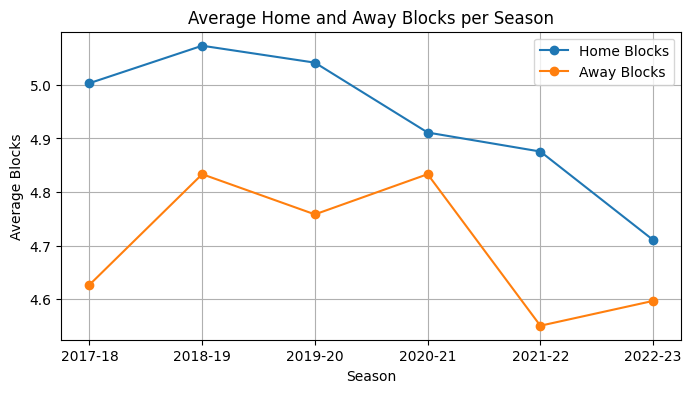

In [23]:
x.plot(marker='o', figsize=(8, 4))
plt.xlabel('Season')
plt.ylabel('Average Blocks')
plt.title('Average Home and Away Blocks per Season')
plt.legend(['Home Blocks', 'Away Blocks'])
plt.grid(True)
plt.show()

####   רואים בטבלה וכן בגרף המציג את השוני בין כמות החסימות שיש בכל עונה ניתן להסיק שמשחק הבית נותן ביטחון לשחקנים שמוסבר על ידי כמות חסימות גדולות מאשר במשחקי החוץ  

#### מסקנה שתמיד בבית אתה תעשה יותר חסימות 

In [24]:
y = data.groupby('SEASON')[['W_HOME', 'W_AWAY']].mean()
y

,W_HOME,W_AWAY
SEASON,,
2017-18,0.578862,0.421138
2018-19,0.592683,0.407317
2019-20,0.551464,0.448536
2020-21,0.543519,0.456481
2021-22,0.543902,0.456098
2022-23,0.580488,0.419512


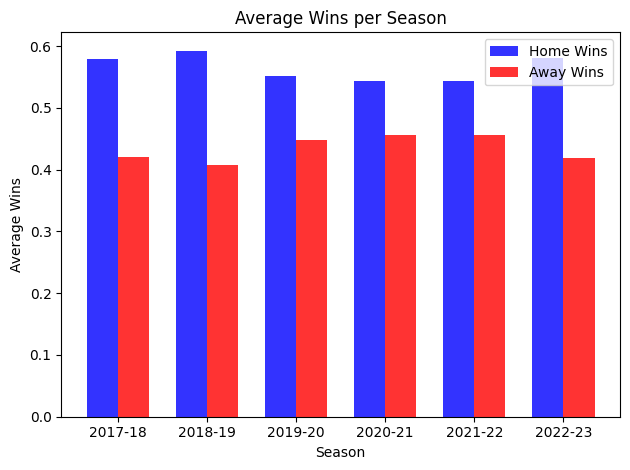

In [25]:
y = data.groupby('SEASON')[['W_HOME', 'W_AWAY']].mean()

fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.8

seasons = y.index
home_wins = y['W_HOME']
away_wins = y['W_AWAY']

index = np.arange(len(seasons))

plt.bar(index, home_wins, bar_width, alpha=opacity, color='b', label='Home Wins')
plt.bar(index + bar_width, away_wins, bar_width, alpha=opacity, color='r', label='Away Wins')

plt.xlabel('Season')
plt.ylabel('Average Wins')
plt.title('Average Wins per Season')
plt.xticks(index + bar_width / 2, seasons)
plt.legend()

plt.tight_layout()
plt.show()

#### ההיסטוגרמה מתארת שרוב הקבוצות מנצחות במשחקים שמתרחשים בבית נתון שככל הנראה מובן מאליו אבל

In [33]:
def get_count(a,b):
    count=0
    for i in range(a,b):
        if data.loc[i,'AWAY']=='Nuggets':
            count+=data.loc[i,'W_AWAY']
    return count

In [34]:
season = {'0':count1, '1':count2, '2':count3, '3':count4, '4':count5}  
win = {'0': '2017-2018', '1':'2018-2019', '2':'2019-2020', '3':'2020-2021', '4':'2021-2022'}
df = pd.DataFrame({'WIN_AWAY': season, 'season':win})
df

,WIN_AWAY,season
0,15,2017-2018
1,20,2018-2019
2,20,2019-2020
3,22,2020-2021
4,25,2021-2022


In [35]:
count1= get_count(0,1232)
count2=get_count(1232,2462)
count3=get_count(2462,3519)
count4=get_count(3519,4600)
count5=get_count(4600,5830)
count1,count2,count3,count4,count5

(15, 20, 20, 22, 25)

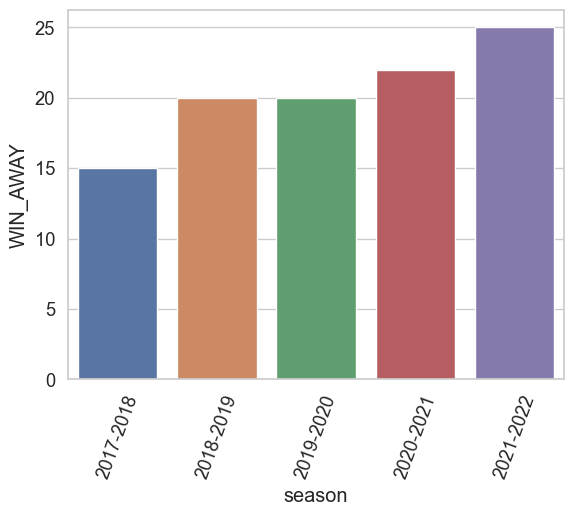

In [36]:
sns.barplot(data = df, x='season', y='WIN_AWAY')
plt.xticks(rotation=70)
plt.show()

#### המנצחת של עונת 2023 באליפות המשחק היא קבוצה בשם דנבר נאגטס וההבדל המשמעותי הוא ניצחון במשחקי חוץ 

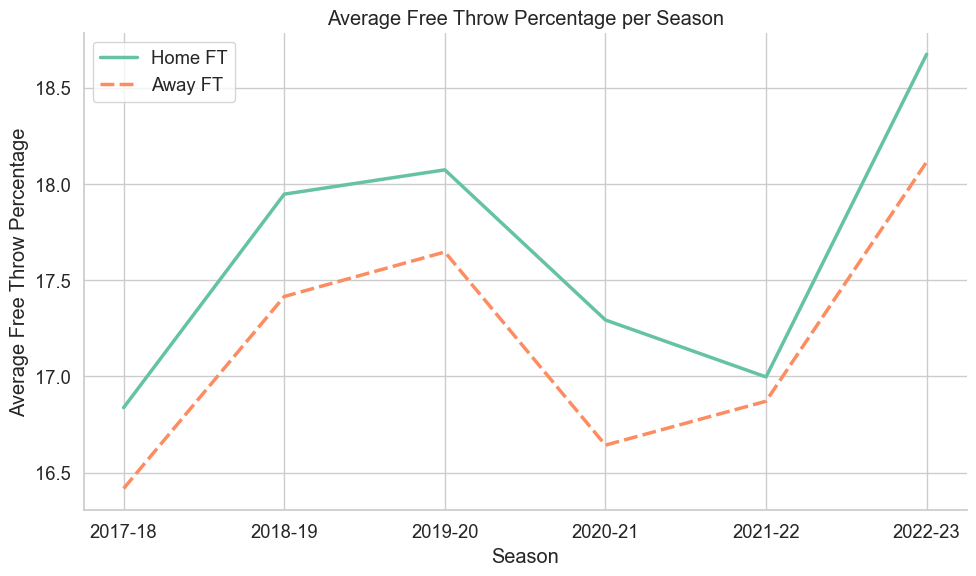

In [37]:
y = data.groupby('SEASON')[['HOME_FT', 'AWAY_FT']].mean()

sns.set(style="whitegrid", font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(data=y, palette="Set2", linewidth=2.5)
ax.set_xlabel('Season')
ax.set_ylabel('Average Free Throw Percentage')
ax.set_title('Average Free Throw Percentage per Season')

plt.legend(labels=['Home FT', 'Away FT'], loc='best')
plt.tight_layout()

sns.despine()

plt.show()

#### קודם כל מדובר על זריקות עונשין שקוראות לרוב כשקבוצה עושה פאוול לכן הייתי חושב שיהיה הבדל בין הזריקות בבית לבין החוץ ורואים שאין הבדל גדול ניתן לראות גם בטבלה למטה תרחיש זה מוסבר שהשחקנים אדישים לצעקות והקללות של הקבוצה היריבה

#### ניתן לראות שבשנים האחרונות יש עלייה בזריקות העונשין תרחיש שיוסבר בהמשך

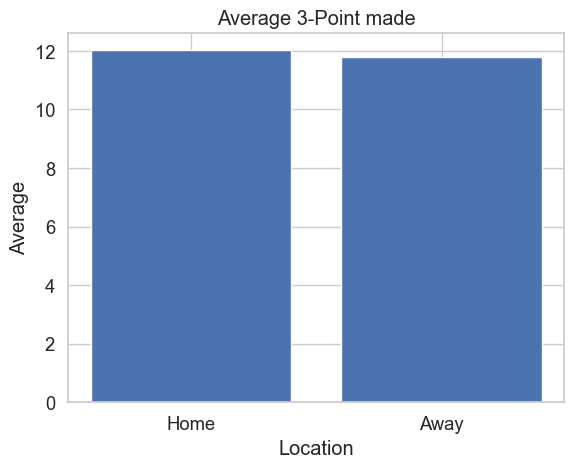

In [38]:
avg_home_fg3 = data['HOME_FG3'].mean()
avg_away_fg3 = data['AWAY_FG3'].mean()

# Create a bar plot to visualize the averages
labels = ['Home', 'Away']
averages = [avg_home_fg3, avg_away_fg3]

plt.bar(labels, averages)
plt.title('Average 3-Point made')
plt.xlabel('Location')
plt.ylabel('Average')

plt.show()

#### ניתן לראות שאין הבדל בין הנסיונות לזריקות של שלשות בין משחקי בית לחוץ

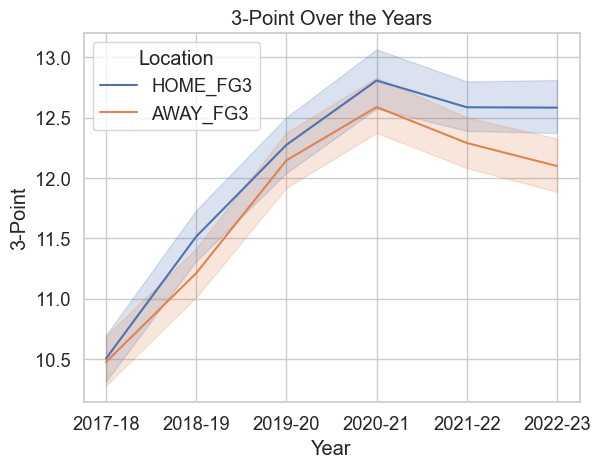

In [39]:
melted_df = data.melt(id_vars='SEASON', value_vars=['HOME_FG3', 'AWAY_FG3'],
                    var_name='Location', value_name='3-Point')


sns.lineplot(x='SEASON', y='3-Point', hue='Location', data=melted_df)


plt.xlabel('Year')
plt.ylabel('3-Point')
plt.title('3-Point Over the Years')


plt.show()

####  ניתן לראות שהמשחק חווה שינוי משמעותי בזריקות שלשות, מה שפעם היה נחשב לדבר פחות צפוי 

#### בנוסף העלייה בזריקות העונשין שדיברנו לעיל מוסברת על ידי הירידה בגרף מפני שירידה בשלשות מוסברת בהגנה יותר מאסיבית ועקב כך מספר העבירות עולה לכן מספר העונשין גם עלה 

In [40]:
warriors_home_data = data[data['HOME'] == 'Warriors']

warriors_home_blocks_avg = warriors_home_data['HOME_BLK'].mean()
warriors_home_steals_avg = warriors_home_data['HOME_STL'].mean()


other_teams_home_blocks_avg = data[data['HOME'] != 'Warriors']['HOME_BLK'].mean()
other_teams_home_steals_avg = data[data['HOME'] != 'Warriors']['HOME_STL'].mean()

print("Average Blocks - Warriors (Home): {:.2f}".format(warriors_home_blocks_avg))
print("Average Blocks - Other Teams (Home): {:.2f}".format(other_teams_home_blocks_avg))
print("Average Steals - Warriors (Home): {:.2f}".format(warriors_home_steals_avg))
print("Average Steals - Other Teams (Home): {:.2f}".format(other_teams_home_steals_avg))



Average Blocks - Warriors (Home): 5.38
Average Blocks - Other Teams (Home): 4.92
Average Steals - Warriors (Home): 8.00
Average Steals - Other Teams (Home): 7.52


In [41]:
data['DATE'] = pd.to_datetime(data['DATE'])
data[['DATE']].dtypes
data['month'] = pd.DatetimeIndex(data['DATE']).month
data[['month','DATE']].head(3)

,month,DATE
0,4,2018-04-10
1,4,2018-04-08
2,4,2018-04-06


In [42]:
s_4 =data[data['month']==4]
s_4


,Unnamed: 0,MATCHID,DATE,SEASON,HOME,AWAY,W_HOME,W_AWAY,HOME_FG,AWAY_FG,...,AWAY_AST,HOME_STL,AWAY_STL,HOME_TURNOVERS,AWAY_TURNOVERS,HOME_BLK,AWAY_BLK,HOME_PTS,AWAY_PTS,month
0,0,21701214,2018-04-10,2017-18,Hawks,76ers,0,1,41,43,...,29,10,7,10,18,3,8,113,121,4
1,1,21701202,2018-04-08,2017-18,Celtics,Hawks,0,1,42,43,...,23,9,7,12,13,6,4,106,112,4
2,2,21701184,2018-04-06,2017-18,Wizards,Hawks,0,1,35,38,...,24,8,5,12,18,4,5,97,103,4
3,3,21701172,2018-04-04,2017-18,Hawks,Heat,0,1,33,42,...,23,5,9,16,12,6,10,86,115,4
4,4,21701158,2018-04-03,2017-18,Heat,Hawks,1,0,41,37,...,24,10,10,14,18,8,1,101,98,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6959,6959,22201170,2023-04-02,2022-23,Kings,Spurs,0,1,49,52,...,31,9,8,15,18,5,3,134,142,4
7001,7001,22201226,2023-04-09,2022-23,Thunder,Grizzlies,1,0,45,40,...,25,5,8,16,12,2,4,115,100,4
7002,7002,22201200,2023-04-06,2022-23,Jazz,Thunder,0,1,41,39,...,29,5,12,19,13,2,2,98,114,4
7017,7017,22201176,2023-04-04,2022-23,Hornets,Raptors,0,1,36,42,...,27,3,13,18,7,4,7,100,120,4


In [43]:
s_the_rest = data[data['month']!=4]
s_the_rest

,Unnamed: 0,MATCHID,DATE,SEASON,HOME,AWAY,W_HOME,W_AWAY,HOME_FG,AWAY_FG,...,AWAY_AST,HOME_STL,AWAY_STL,HOME_TURNOVERS,AWAY_TURNOVERS,HOME_BLK,AWAY_BLK,HOME_PTS,AWAY_PTS,month
6,6,21701130,2018-03-30,2017-18,Hawks,76ers,0,1,36,42,...,34,9,10,17,15,4,6,91,101,3
7,7,21701120,2018-03-28,2017-18,Timberwolves,Hawks,1,0,48,41,...,26,9,10,13,19,1,2,126,114,3
8,8,21701101,2018-03-25,2017-18,Rockets,Hawks,1,0,44,39,...,18,7,5,12,13,4,2,118,99,3
9,9,21701087,2018-03-23,2017-18,Warriors,Hawks,1,0,42,37,...,24,8,5,7,11,6,5,106,94,3
10,10,21701077,2018-03-22,2017-18,Kings,Hawks,1,0,43,33,...,19,8,7,14,14,9,2,105,90,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7054,7054,22200052,2022-10-25,2022-23,Wizards,Pistons,1,0,44,36,...,12,7,6,12,13,7,1,120,99,10
7055,7055,22200992,2023-03-09,2022-23,Pistons,Hornets,0,1,40,43,...,24,5,11,19,13,4,9,103,113,3
7056,7056,22200919,2023-02-27,2022-23,Hornets,Pistons,1,0,43,42,...,18,8,12,17,9,3,3,117,106,2
7057,7057,22200785,2023-02-03,2022-23,Pistons,Hornets,1,0,44,40,...,22,7,16,23,14,3,2,118,112,2


In [44]:
x = s_the_rest.groupby('SEASON')[['HOME_AST', 'AWAY_AST', 'HOME_STL', 'AWAY_STL','HOME_TURNOVERS', 'AWAY_TURNOVERS']].mean()
x

,HOME_AST,AWAY_AST,HOME_STL,AWAY_STL,HOME_TURNOVERS,AWAY_TURNOVERS
SEASON,,,,,,
2017-18,23.639229,22.640105,7.664623,7.754816,14.235552,14.348511
2018-19,25.051260,23.981755,7.649001,7.670721,14.099913,14.212858
2019-20,24.923513,23.847970,7.520302,7.777148,14.601511,14.484419
2020-21,25.000000,24.477381,7.327381,7.675000,14.148810,13.544048
2021-22,24.897391,24.108696,7.619130,7.605217,13.660000,13.894783
2022-23,25.573276,24.846552,7.345690,7.244828,14.047414,14.206897


In [45]:
y = s_4.groupby('SEASON')[['HOME_AST', 'AWAY_AST', 'HOME_STL', 'AWAY_STL','HOME_TURNOVERS', 'AWAY_TURNOVERS']].mean()
y

,HOME_AST,AWAY_AST,HOME_STL,AWAY_STL,HOME_TURNOVERS,AWAY_TURNOVERS
SEASON,,,,,,
2017-18,24.920455,24.079545,7.761364,7.852273,13.840909,13.897727
2018-19,26.405063,24.810127,6.974684,7.531646,13.240506,12.784810
2020-21,24.883333,25.183333,7.900000,7.741667,13.712500,13.883333
2021-22,27.187500,26.300000,7.637500,8.162500,13.562500,13.537500
2022-23,26.357143,27.814286,7.042857,7.357143,13.600000,13.528571


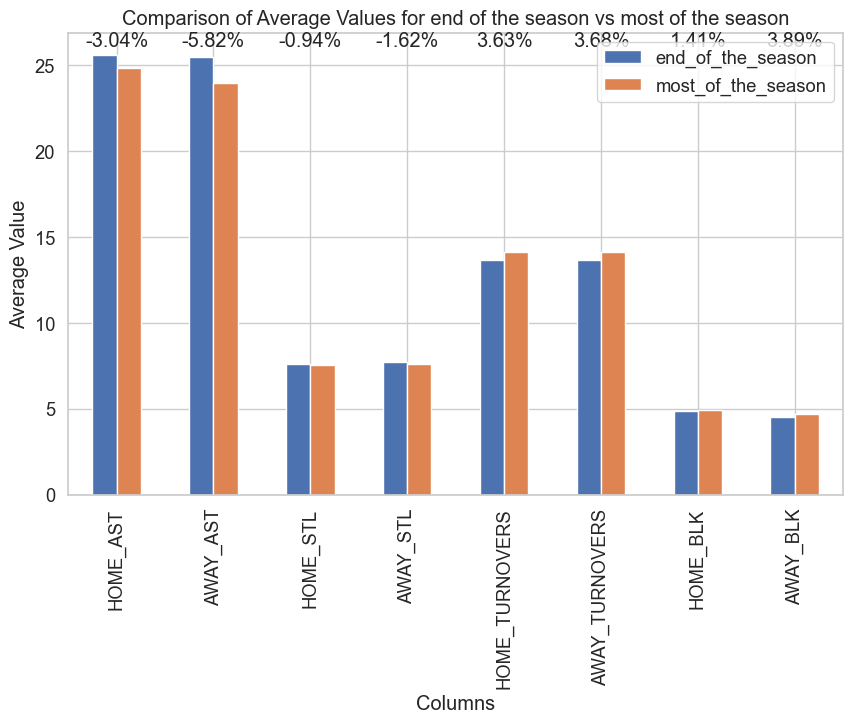

In [48]:
data["finish"] = data['month']==4
data["finish"]
end_of_the_season = data[data['finish'] == True]
Most_of_the_season = data[data['finish'] == False]

end_of_the_season_avg = end_of_the_season[['HOME_AST', 'AWAY_AST', 'HOME_STL', 'AWAY_STL', 'HOME_TURNOVERS', 'AWAY_TURNOVERS','HOME_BLK', 'AWAY_BLK']].mean()
Most_of_the_season_avg = Most_of_the_season[['HOME_AST', 'AWAY_AST', 'HOME_STL', 'AWAY_STL', 'HOME_TURNOVERS', 'AWAY_TURNOVERS','HOME_BLK', 'AWAY_BLK']].mean()

comparison = pd.DataFrame({'end_of_the_season': end_of_the_season_avg, 'most_of_the_season': Most_of_the_season_avg})


percentage_change = ((comparison['most_of_the_season'] - comparison['end_of_the_season']) / comparison['end_of_the_season']) * 100


ax = comparison.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Columns')
plt.ylabel('Average Value')
plt.title('Comparison of Average Values for end of the season vs most of the season')
plt.legend()


for i, val in enumerate(percentage_change):
    ax.text(i, comparison.max().max() + 0.5, f'{val:.2f}%', ha='center')

plt.show()

### חילקנו את הדאטה לרוב העונה ולחודש האחרון של העונה 


####    אנחנו רוצים להראות שבסוף העונה למרות שהשחקנים עייפים ומופעל עליהם לחץ רב (מועדון,אוהדים) ,ציפינו לראות שהמשחקים בחודש זה יהיו ביצועים חלשים
#### הנתונים מראים אחרת וניתן להסביר זאת שהמשחקים בחודש האחרון משפיעים על העונה כולה    

